Payoff matrix (row: player A strategy, col: player B strategy):
(6, 6) | (6, 6) | (6, 6) | (6, 5) | (6, 5) | (6, 5) | (10, 8) | (10, 9) | (10, 10)
(6, 6) | (6, 6) | (6, 6) | (6, 5) | (6, 5) | (6, 5) | (11, 8) | (11, 9) | (6, 4)
(6, 6) | (6, 6) | (6, 6) | (6, 5) | (6, 5) | (6, 5) | (12, 8) | (6, 4) | (6, 4)
(5, 6) | (5, 6) | (5, 6) | (9, 9) | (9, 10) | (9, 11) | (9, 8) | (9, 9) | (9, 10)
(5, 6) | (5, 6) | (5, 6) | (10, 9) | (10, 10) | (5, 5) | (10, 8) | (10, 9) | (5, 4)
(5, 6) | (5, 6) | (5, 6) | (11, 9) | (5, 5) | (5, 5) | (11, 8) | (5, 4) | (5, 4)
(8, 10) | (8, 11) | (8, 12) | (8, 9) | (8, 10) | (8, 11) | (8, 8) | (8, 9) | (8, 10)
(9, 10) | (9, 11) | (4, 6) | (9, 9) | (9, 10) | (4, 5) | (9, 8) | (9, 9) | (4, 4)
(10, 10) | (4, 6) | (4, 6) | (10, 9) | (4, 5) | (4, 5) | (10, 8) | (4, 4) | (4, 4)


100%|██████████| 10000/10000 [54:05<00:00,  3.08it/s]


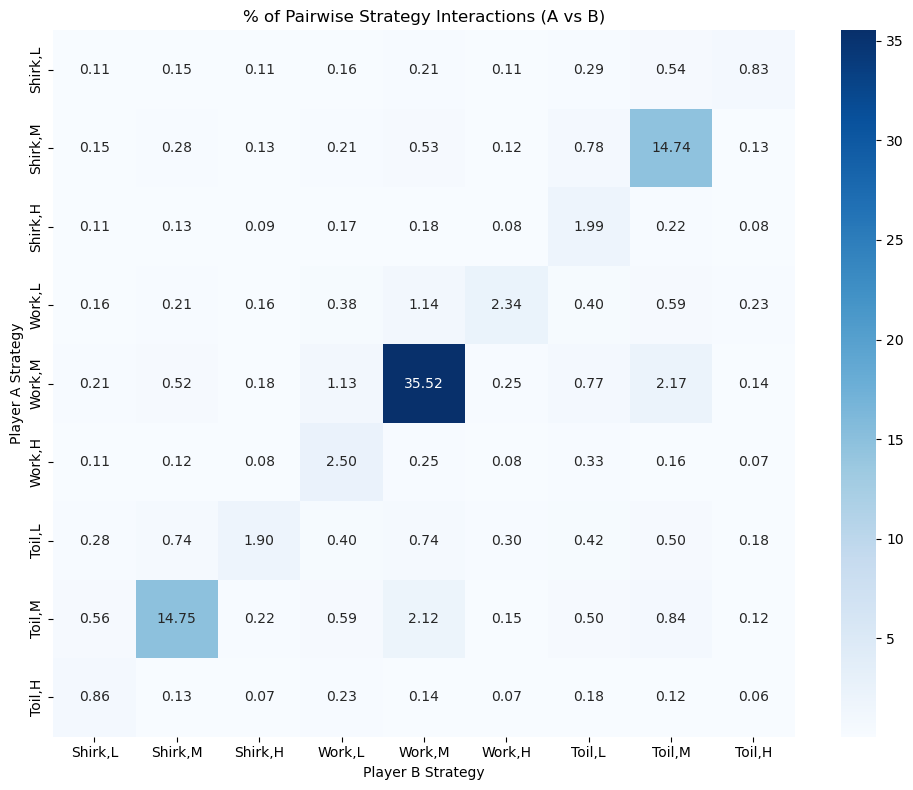

In [21]:
# Placeholder structure: full simulation using 9x9 payoff matrix (Shirk/Work/Toil × L/M/H)
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm 

def run_full_matrix_simulation(agentnum=50, memorylength=15, xxx=1200, payoff_matrix=None, mutation_rate=0.0):
    if payoff_matrix is None:
        raise ValueError("You must provide a full 9x9 payoff matrix.")

    stratnum = 9
    agentnumA = agentnum // 2
    interaction_counts = np.zeros((stratnum, stratnum), dtype=int)  # Count (A strategy, B strategy) interactions

    for _ in tqdm(range(10000)):
        agents = np.full((agentnum, memorylength), 20, dtype=int)
        a_indices = np.random.randint(0, agentnumA, xxx)
        b_indices = np.random.randint(agentnumA, agentnum, xxx)

        for step in range(xxx):
            a = a_indices[step]
            b = b_indices[step]

            memory_a = agents[a, agents[a] != 20]
            BR = np.zeros(stratnum)
            if len(memory_a) > 0:
                for k in range(stratnum):
                    BR[k] = np.sum([payoff_matrix[k][s][0] for s in memory_a])
            astrat = np.random.choice(np.flatnonzero(BR == BR.max())) if random.random() > mutation_rate else random.randint(0, stratnum - 1)

            memory_b = agents[b, agents[b] != 20]
            BR = np.zeros(stratnum)
            if len(memory_b) > 0:
                for k in range(stratnum):
                    BR[k] = np.sum([payoff_matrix[k][s][0] for s in memory_b])
            bstrat = np.random.choice(np.flatnonzero(BR == BR.max())) if random.random() > mutation_rate else random.randint(0, stratnum - 1)

            # Track the interaction pair
            interaction_counts[astrat, bstrat] += 1

            agents[a, :-1] = agents[a, 1:]
            agents[a, -1] = bstrat
            agents[b, :-1] = agents[b, 1:]
            agents[b, -1] = astrat

            agents[a, :-1] = agents[a, 1:]
            agents[a, -1] = bstrat
            agents[b, :-1] = agents[b, 1:]
            agents[b, -1] = astrat

        last_strats = agents[:, -1]
        valid_strats = last_strats[last_strats != 20]
        # No longer tracking modal outcomes; skip this block

    return interaction_counts

# Define the full 9x9 payoff matrix here (row = self strategy, col = opponent strategy)
# Each entry should be a tuple (row_player_payoff, col_player_payoff)
# For demonstration, this is filled with placeholder values
full_payoff_matrix = np.zeros((9, 9, 2), dtype=int)  # (row, col, player)

# Original full 9x9 payoff matrix from the paper
full_payoff_matrix = np.zeros((9, 9, 2), dtype=int)

# Contribution and demand mappings
contrib = [6, 6, 6, 5, 5, 5, 4, 4, 4]  # effort payoff
part = [4, 5, 6, 4, 5, 6, 4, 5, 6]     # demand

# Define when project succeeds
for i in range(9):
    for j in range(9):
        c1, c2 = contrib[i], contrib[j]
        d1, d2 = part[i], part[j]

        # Extract contribution levels (Shirk = 0, Work = 1, Toil = 2)
        cl1, cl2 = i // 3, j // 3

        # Determine if project succeeds
        project_success = not (
            (cl1 == 0 and cl2 == 0) or
            (cl1 == 0 and cl2 == 1) or
            (cl1 == 1 and cl2 == 0)
        )

        if project_success:
            if d1 + d2 <= 10:
                full_payoff_matrix[i, j, 0] = c1 + d1
                full_payoff_matrix[i, j, 1] = c2 + d2
            else:
                full_payoff_matrix[i, j, 0] = c1
                full_payoff_matrix[i, j, 1] = c2
        else:
            full_payoff_matrix[i, j, 0] = c1
            full_payoff_matrix[i, j, 1] = c2

# Print the payoff matrix for verification
print("Payoff matrix (row: player A strategy, col: player B strategy):")
for i in range(9):
    row = []
    for j in range(9):
        row.append(f"{tuple(full_payoff_matrix[i, j])}")
    print(" | ".join(row))

# Revised full 9x9 payoff matrix from the paper
revised_payoff_matrix = np.zeros((9, 9, 2), dtype=int)

# Revised effort and demand values
rev_contrib = [5, 5, 5, 3, 3, 3, 1, 1, 1]
rev_part = [3, 5, 7, 3, 5, 7, 3, 5, 7]

# Populate the revised matrix using the same project success logic
for i in range(9):
    for j in range(9):
        c1, c2 = rev_contrib[i], rev_contrib[j]
        d1, d2 = rev_part[i], rev_part[j]

        cl1, cl2 = i // 3, j // 3
        project_success = not (
            (cl1 == 0 and cl2 == 0) or
            (cl1 == 0 and cl2 == 1) or
            (cl1 == 1 and cl2 == 0)
        )

        if project_success:
            if d1 + d2 <= 10:
                revised_payoff_matrix[i, j, 0] = c1 + d1
                revised_payoff_matrix[i, j, 1] = c2 + d2
            else:
                revised_payoff_matrix[i, j, 0] = c1
                revised_payoff_matrix[i, j, 1] = c2
        else:
            revised_payoff_matrix[i, j, 0] = c1
            revised_payoff_matrix[i, j, 1] = c2

# Run the simulation
# results = run_full_matrix_simulation(payoff_matrix=full_payoff_matrix)
results_revised = run_full_matrix_simulation(payoff_matrix=revised_payoff_matrix)

# Strategy labels matching 9 compound strategies
labels = [
    "Shirk,L", "Shirk,M", "Shirk,H",
    "Work,L", "Work,M", "Work,H",
    "Toil,L", "Toil,M", "Toil,H"
]

# Plotting interaction heatmap
import seaborn as sns
import pandas as pd

# Normalize to get percentages
results_percent = results / results.sum() * 100

# Convert to DataFrame for labeling
df = pd.DataFrame(results_percent, index=labels, columns=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, fmt=".2f", cmap="Blues")
plt.title("% of Pairwise Strategy Interactions (A vs B)")
plt.ylabel("Player A Strategy")
plt.xlabel("Player B Strategy")
plt.tight_layout()
plt.show()


array([[  13614,   17627,   12864,   18922,   25246,   12885,   34757,
          65262,   99385],
       [  17441,   33641,   15445,   25697,   63029,   14117,   94027,
        1769034,   15799],
       [  12782,   15269,   10992,   20331,   21731,    9695,  239253,
          26966,    9077],
       [  18646,   25167,   19555,   45472,  137112,  280749,   48538,
          70585,   27950],
       [  25015,   62032,   21717,  135490, 4262194,   30366,   91823,
         260246,   16564],
       [  13032,   14272,    9946,  300024,   29834,    9449,   39394,
          19093,    8085],
       [  34116,   88887,  227451,   48086,   89087,   35470,   50503,
          59866,   21586],
       [  66896, 1770550,   25848,   71104,  254643,   18566,   60467,
         101201,   14609],
       [ 102736,   15879,    8976,   27783,   16547,    7947,   21829,
          14691,    7438]])

In [ ]:
# Placeholder structure: full simulation using 9x9 payoff matrix (Shirk/Work/Toil × L/M/H)
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm


def run_strategy_initialization_simulation(agentnum=50, xxx=1200, payoff_matrix=None, num_initializations=10000, mutation_rate=0.0):
    if payoff_matrix is None:
        raise ValueError("You must provide a full 9x9 payoff matrix.")

    stratnum = 9
    agentnumA = agentnum // 2
    basin_counts = np.zeros(5, dtype=int)  # Five outcome types

    for _ in tqdm(range(num_initializations)):
        memorylength = 15
        stratnum = 9
        agents = np.full((agentnum, memorylength), 20, dtype=int)  # Fixed strategy for each agent, 20, dtype=int)
        a_indices = np.random.randint(0, agentnumA, xxx)
        b_indices = np.random.randint(agentnumA, agentnum, xxx)

        for step in range(xxx):
            a = random.randint(0, agentnum // 2 - 1)
            b = random.randint(agentnum // 2, agentnum - 1)

            memory_a = agents[a, agents[a] != 20]
            BR = np.zeros(stratnum)
            if len(memory_a) > 0:
                for k in range(stratnum):
                    BR[k] = np.sum([payoff_matrix[k][s][0] for s in memory_a])
            astrat = np.random.choice(np.flatnonzero(BR == BR.max())) if random.random() > mutation_rate else random.randint(0, stratnum - 1)

            memory_b = agents[b, agents[b] != 20]
            BR = np.zeros(stratnum)
            if len(memory_b) > 0:
                for k in range(stratnum):
                    BR[k] = np.sum([payoff_matrix[k][s][0] for s in memory_b])
            bstrat = np.random.choice(np.flatnonzero(BR == BR.max())) if random.random() > mutation_rate else random.randint(0, stratnum - 1)

            agents[a, :-1] = agents[a, 1:]
            agents[a, -1] = bstrat
            agents[b, :-1] = agents[b, 1:]
            agents[b, -1] = astrat

            # Track the interaction pair
#             interaction_counts[astrat, bstrat] += 1

            # No memory update needed; strategies are fixed

            agents[a, :-1] = agents[a, 1:]
            agents[a, -1] = bstrat
            agents[b, :-1] = agents[b, 1:]
            agents[b, -1] = astrat

        # At the end of the run, determine modal strategy
        last_strats = agents[:, -1]
        valid_strats = last_strats[last_strats != 20]
        if len(valid_strats) == 0:
            continue

        (unique_strats, counts) = np.unique(valid_strats, return_counts=True)
        modal_strategy = unique_strats[np.argmax(counts)]

        # Classify into one of 5 basin types
        if modal_strategy == 4:
            basin_counts[0] += 1  # Work,M / Work,M
        elif modal_strategy == 3 or modal_strategy == 5:
            basin_counts[1] += 1  # Work,L / Work,H
        elif modal_strategy == 2:
            basin_counts[2] += 1  # Shirk,H / Toil,L
        elif modal_strategy == 1:
            basin_counts[3] += 1  # Shirk,M / Toil,M
        elif modal_strategy == 0:
            basin_counts[4] += 1  # Shirk,L / Toil,H

    return basin_counts

# Define the full 9x9 payoff matrix here (row = self strategy, col = opponent strategy)
# Each entry should be a tuple (row_player_payoff, col_player_payoff)
# For demonstration, this is filled with placeholder values
full_payoff_matrix = np.zeros((9, 9, 2), dtype=int)  # (row, col, player)

# Original full 9x9 payoff matrix from the paper
full_payoff_matrix = np.zeros((9, 9, 2), dtype=int)

# Contribution and demand mappings
contrib = [6, 6, 6, 5, 5, 5, 4, 4, 4]  # effort payoff
part = [4, 5, 6, 4, 5, 6, 4, 5, 6]     # demand

# Define when project succeeds
for i in range(9):
    for j in range(9):
        c1, c2 = contrib[i], contrib[j]
        d1, d2 = part[i], part[j]

        # Extract contribution levels (Shirk = 0, Work = 1, Toil = 2)
        cl1, cl2 = i // 3, j // 3

        # Determine if project succeeds
        project_success = not (
            (cl1 == 0 and cl2 == 0) or
            (cl1 == 0 and cl2 == 1) or
            (cl1 == 1 and cl2 == 0)
        )

        if project_success:
            if d1 + d2 <= 10:
                full_payoff_matrix[i, j, 0] = c1 + d1
                full_payoff_matrix[i, j, 1] = c2 + d2
            else:
                full_payoff_matrix[i, j, 0] = c1
                full_payoff_matrix[i, j, 1] = c2
        else:
            full_payoff_matrix[i, j, 0] = c1
            full_payoff_matrix[i, j, 1] = c2

# Print the payoff matrix for verification
print("Payoff matrix (row: player A strategy, col: player B strategy):")
for i in range(9):
    row = []
    for j in range(9):
        row.append(f"{tuple(full_payoff_matrix[i, j])}")
    print(" | ".join(row))

# Revised full 9x9 payoff matrix from the paper
revised_payoff_matrix = np.zeros((9, 9, 2), dtype=int)

# Revised effort and demand values
rev_contrib = [5, 5, 5, 3, 3, 3, 1, 1, 1]
rev_part = [3, 5, 7, 3, 5, 7, 3, 5, 7]

# Populate the revised matrix using the same project success logic
for i in range(9):
    for j in range(9):
        c1, c2 = rev_contrib[i], rev_contrib[j]
        d1, d2 = rev_part[i], rev_part[j]

        cl1, cl2 = i // 3, j // 3
        project_success = not (
            (cl1 == 0 and cl2 == 0) or
            (cl1 == 0 and cl2 == 1) or
            (cl1 == 1 and cl2 == 0)
        )

        if project_success:
            if d1 + d2 <= 10:
                revised_payoff_matrix[i, j, 0] = c1 + d1
                revised_payoff_matrix[i, j, 1] = c2 + d2
            else:
                revised_payoff_matrix[i, j, 0] = c1
                revised_payoff_matrix[i, j, 1] = c2
        else:
            revised_payoff_matrix[i, j, 0] = c1
            revised_payoff_matrix[i, j, 1] = c2

# Run the simulation for strategy initialization
results = run_strategy_initialization_simulation(payoff_matrix=full_payoff_matrix)

# Strategy labels matching 9 compound strategies
labels = [
    "Shirk,L", "Shirk,M", "Shirk,H",
    "Work,L", "Work,M", "Work,H",
    "Toil,L", "Toil,M", "Toil,H"
]

# Plotting interaction heatmap
import seaborn as sns
import pandas as pd

# Convert basin results to percent
basin_labels = [
    "Work,M / Work,M",
    "Work,L / Work,H",
    "Shirk,H / Toil,L",
    "Shirk,M / Toil,M",
    "Shirk,L / Toil,H"
]
results_percent = results / results.sum() * 100

# Convert to DataFrame for labeling
basin_df = pd.DataFrame({"% of Outcomes": results_percent}, index=basin_labels)

plt.figure(figsize=(10, 8))
sns.barplot(x=basin_df.index, y=basin_df["% of Outcomes"], palette="Blues_d")
plt.title("Basin of Attraction by Outcome Type")
plt.ylabel("% of Simulations")
plt.xlabel("Outcome Type")
plt.tight_layout()
plt.show()


Payoff matrix (row: player A strategy, col: player B strategy):
(6, 6) | (6, 6) | (6, 6) | (6, 5) | (6, 5) | (6, 5) | (10, 8) | (10, 9) | (10, 10)
(6, 6) | (6, 6) | (6, 6) | (6, 5) | (6, 5) | (6, 5) | (11, 8) | (11, 9) | (6, 4)
(6, 6) | (6, 6) | (6, 6) | (6, 5) | (6, 5) | (6, 5) | (12, 8) | (6, 4) | (6, 4)
(5, 6) | (5, 6) | (5, 6) | (9, 9) | (9, 10) | (9, 11) | (9, 8) | (9, 9) | (9, 10)
(5, 6) | (5, 6) | (5, 6) | (10, 9) | (10, 10) | (5, 5) | (10, 8) | (10, 9) | (5, 4)
(5, 6) | (5, 6) | (5, 6) | (11, 9) | (5, 5) | (5, 5) | (11, 8) | (5, 4) | (5, 4)
(8, 10) | (8, 11) | (8, 12) | (8, 9) | (8, 10) | (8, 11) | (8, 8) | (8, 9) | (8, 10)
(9, 10) | (9, 11) | (4, 6) | (9, 9) | (9, 10) | (4, 5) | (9, 8) | (9, 9) | (4, 4)
(10, 10) | (4, 6) | (4, 6) | (10, 9) | (4, 5) | (4, 5) | (10, 8) | (4, 4) | (4, 4)


 30%|██▉       | 2966/10000 [16:04<38:11,  3.07it/s]